In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical

IMAGE_SIZE = 28

Using TensorFlow backend.


In [2]:
# load dataset and split train/test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# train data is composed of 60K 28x28 grayscale images of the 10 digits
print(x_train.shape)

# test data has 10K 28x28 grayscale images
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# helper function for image display
def display(index, data, label):
    plt.title("Data index: %d, label: %d" % (index, label[index]))
    plt.imshow(data[index], cmap="gray")
    plt.show()

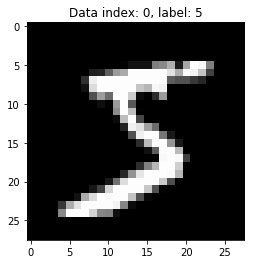

In [4]:
# display first element image
display(0, x_train, y_train)

In [5]:
# reshape data so it can be feed to the NN
x_train_reshaped = x_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
x_test_reshaped = x_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
print(x_train_reshaped.shape)

# normalize data, divide by 255 since each pixel goes from 0 to 255
x_train_normalized = x_train_reshaped/255
x_test_normalized = x_test_reshaped/255
print(x_train_normalized.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [6]:
# make labels categorical, which means assigning a specific index in a array to a given label value,
# in other words, convert each vector element (number) to an array of the same size 
# as the number of clases (10) where a specific position in the array (0..10) defines the label value
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print("%d is: %s" % (y_train[0], y_train_categorical[0]))

5 is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# create the model
model = Sequential()

# input layer
model.add(Conv2D(64, (6,6), input_shape=x_train_normalized.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# aditional convolutional layer
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# dropout layer to avoid overfitting
model.add(Dropout(0.3))

# flatten to get a 1D vector and later connecto to fully conected layers
model.add(Flatten())

# fully connected layers
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

# output layer must have the same inputs (# of neurons) as the # of classes to predict
model.add(Dense(y_train_categorical.shape[1], activation="softmax"))

# compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
# train model
model.fit(x_train_normalized, y_train_categorical, epochs=10, batch_size=64, validation_data=(x_test_normalized, y_test_categorical))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.2479 - acc: 0.9228 - val_loss: 0.0655 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.0807 - acc: 0.9748 - val_loss: 0.0386 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0598 - acc: 0.9813 - val_loss: 0.0355 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0305 - val_acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0435 - acc: 0.9862 - val_loss: 0.0264 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.0392 - acc: 0.9878 - val_loss: 0.0276 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.

In [9]:
# evaluate the model accuracy
accuracy = model.evaluate(x_test_normalized, y_test_categorical)
print(accuracy)

# display the model architecture
model.summary()

10000/10000 [==============================] - 1s 147us/step
[0.024412964372348505, 0.9931]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 64)        2368      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________________________________________________

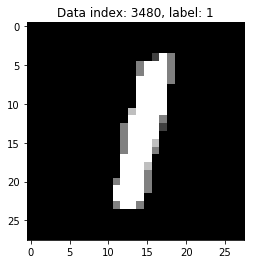

>> predicted: 1


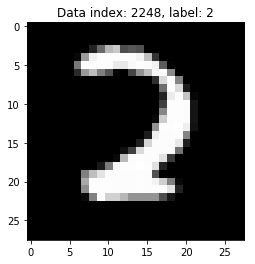

>> predicted: 2


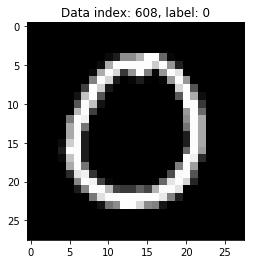

>> predicted: 0


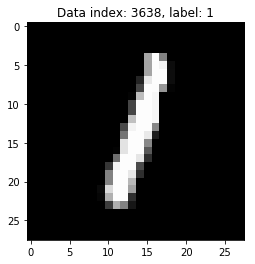

>> predicted: 1


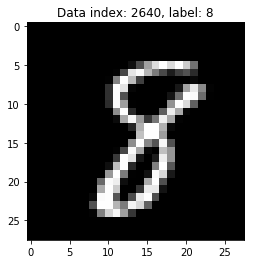

>> predicted: 8


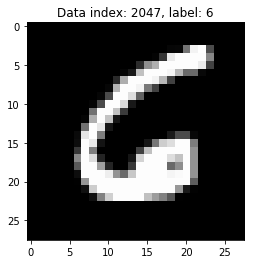

>> predicted: 6


In [10]:
for index in np.random.randint(x_test.shape[0], size=6):
    image = x_test[index].reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
    display(index, x_test, y_test)
    prediction = model.predict([image])[0]
    print(">> predicted: %d" % np.argmax(prediction))